<a href="https://www.kaggle.com/code/miradelimanr/singaporean-food-in-indonesia-ii-sql-version?scriptVersionId=98395684" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Singaporean Food in Indonesia Phrase II : Jawa and Bali Area

For this notebook I'll show you list of Singaporean restaurant in Jawa (Bandung, Semarang, Sleman, Surabaya, Malang, Batu) and Bali Area (Badung, Denpasar). Here is the list curated from Google Maps and various platform website. This time I'll be using Pergi Kuliner, Traveloka Eats, Tripadvisor, and Restaurant Guru.

Originally there are 101 restaurants selected all around Indonesia, which 38 of them are located in this area. Note that the list here is not always the authentic one. There are coffee shop named Kopitiam and Chinese restaurant which has Singaporean food but never claimed themselves as Singaporean restaurant. At least they got kaya toast, hainanse rice, laksa, chili crab and etc, will explain more on menu.

# Content
* Overview
* Menu
* Facility
* Rating

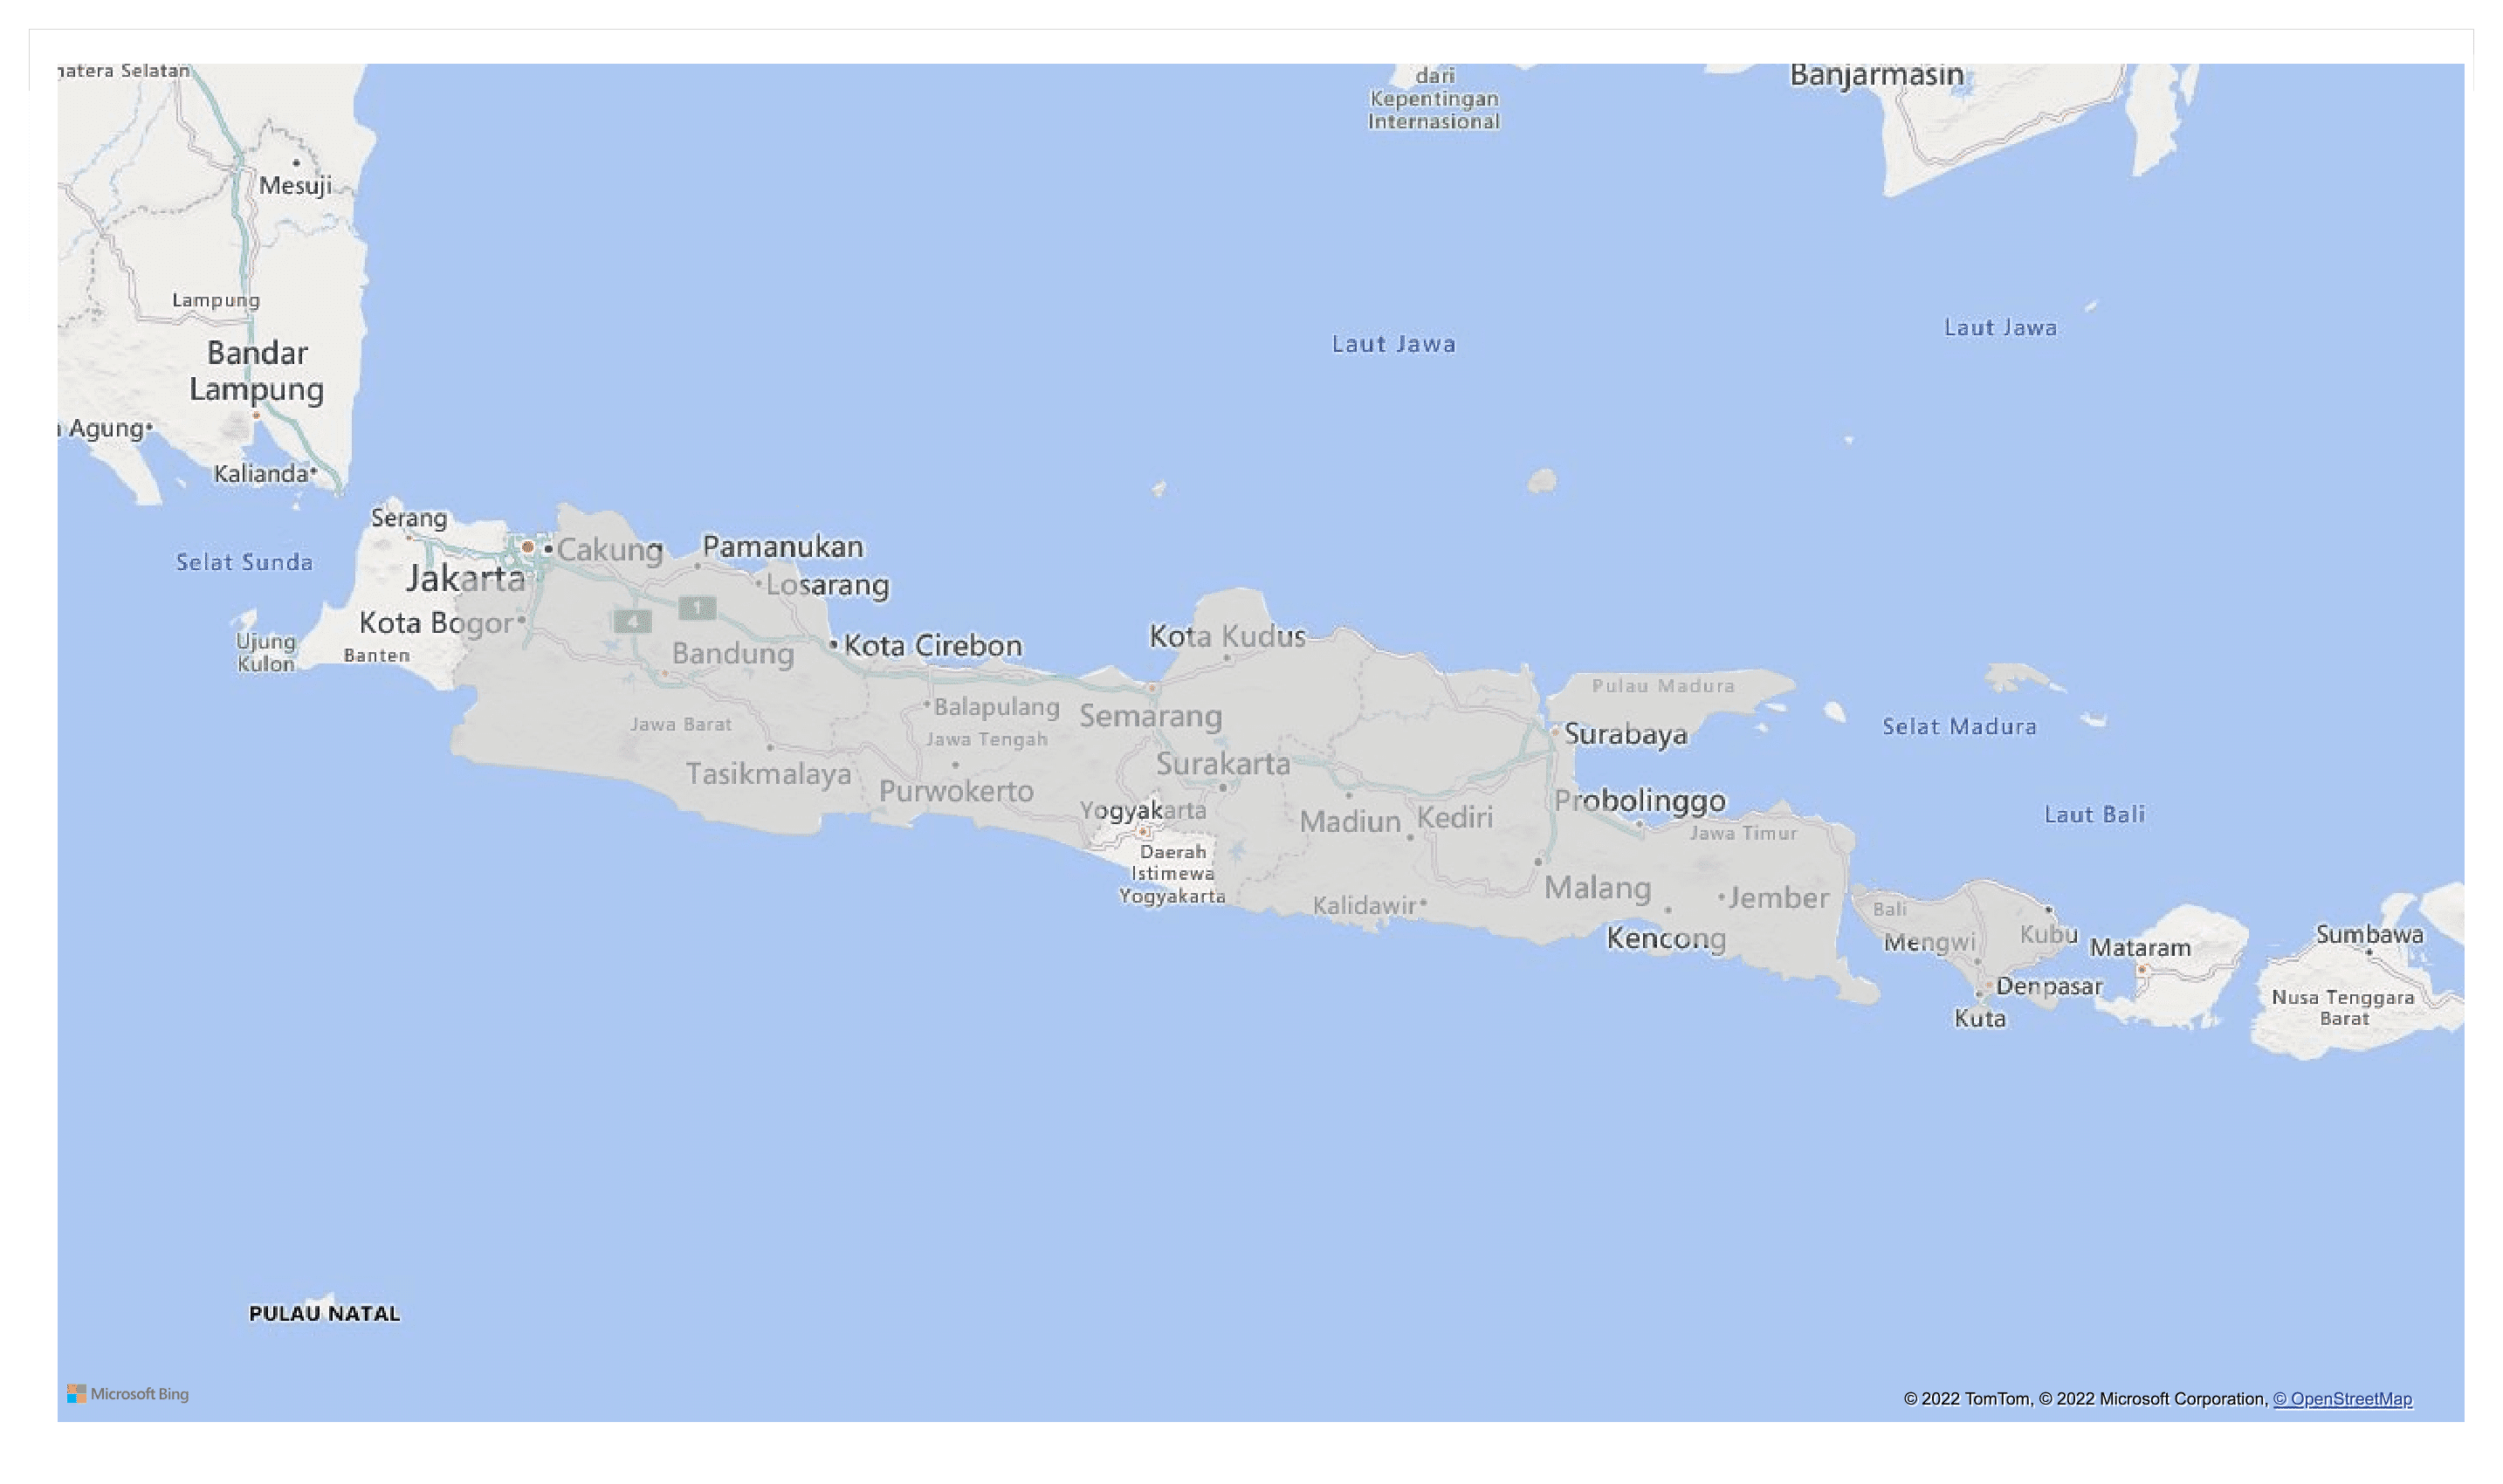

In [14]:
from pandasql import sqldf
import pandas as pd
singapore = pd.read_csv("../input/singapore-food/singapore_id.csv", sep = ";")

# Overview

Here is complete list of restaurants sorted by region and city, there are also their unique menu, price, and ratings. Price range are between 20k until 60k per menu and ratings are quite high here!

In [3]:
singapore = sqldf("""SELECT no, restaurant_name, region, city, unique_menu, price, 
                            ltrim(google_rating) as google_rating, 
                            ltrim(platform_rating) as platform_rating 
                     FROM singapore 
                     WHERE city = 'Bandung' OR 
                           region = 'Central Java' OR 
                           region = 'DI Yogyakarta' OR 
                           region = 'East Java' OR 
                           region = 'Bali'""")
singapore.style.hide_index()

no,restaurant_name,region,city,unique_menu,price,google_rating,platform_rating
40,Laksa 63,West Java,Bandung,Prawn Laksa,29000,4.5,3.8
41,Kopi Scooter Singapore Kopitiam,West Java,Bandung,Bakmi Asin/Manis Bebek,36000,4.2,3.4
41,Sagoo Kitchen & Kopi Lay,West Java,Bandung,Martabak Mee Kari,59900,4.4,3.5
43,Xin Yi Bakuteh,West Java,Bandung,Dried Bakuteh,78000,4.4,4.0
44,Uncle K Paskal,West Java,Bandung,Singapore Curry Laksa,34800,4.2,3.6
45,SING Bakuteh Semarang,Central Java,Semarang,Pork Ribs Soup,49000,4.4,4.0
46,Wee Nam Kee Semarang,Central Java,Semarang,Chicken Rice Set,59000,4.5,4.0
47,Old Kettle,Central Java,Semarang,Nasi Campur Old Kettle,27000,4.4,3.5
48,My Kopi O!,Central Java,Semarang,Nasi Daging Telor Asin,36800,4.4,3.5
49,Old Town White Coffee,Central Java,Semarang,BBQ Chicken Rice,46000,4.2,4.2


# Menu

Singapore is famous for their Laksa as also most mentioned here in this list. Besides, they are also famous for their toast-- kaya toast especially, and hainanse rice. Their noodles are their most mainstream here as their food is kind of fusion with Chinese cuisine, like mee goreng, wonton noodle, and kway teow. Curry noodle and bakuteh are underrated but that's the real signature here. Not to mention their seafood is also well known-- chili crab for example.

I'll divide those menu on three category, which is Rice & Noodle Menu, Poultry Menu, and Toast & Snack Menu.

**Rice & Noodle**

Here is their rice and noodle menu. For the rice they mostly have hainanse rice, fried rice, and nasi lemak. Plate rice is rice with side dish on a plate-- it could be anything. They also have porridge as well. For noodle they mostly have laksa, mee goreng, curry noodle, and wonton noodle. There are also mee shua, mee siam, ifumie (crispy noodle), chop noodle, hokkien mee, and noodle soup. Only **Roti John Singapore (Malang), Tasty Singapore Kitchen (Sleman),** and **PAW Nasi Hainam (Denpasar)** don't have any noodle menu. This represented by the city so you need to check issue for complete list on csv. 

For disambiguation, mee is mie/noodle, fried rice is nasi goreng, kway teow is kwetiaw, beehoon is bihun, and hainanse rice is nasi hainam. Bakmi ayam is quite similar with wonton noodle but it's different after all.

In [5]:
singapore  = sqldf("""SELECT restaurant_name, city, rice_menu, noodle, noodle_specific
                      FROM singapore
                      WHERE city = 'Bandung' OR 
                            region = 'Central Java' OR 
                            region = 'DI Yogyakarta' OR 
                            region = 'East Java' OR 
                            region = 'Bali'
                      GROUP BY city""")
singapore.style.hide_index()

restaurant_name,city,rice_menu,noodle,noodle_specific
Little Singapore by Chef Bernard,Badung,"rice bowl, fried rice",noodle,laksa
Dapur Panda,Badung,"fried rice, porridge","noodle, kway teow, beehoon","laksa, curry noodle, mee siam, mee rebus, mee goreng, prawn noodle, hor fun, mai fun"
Laksa 63,Bandung,"hainanse rice, rice bowl, fried rice, porridge","noodle, kway teow","laksa, yamien, prawn noodle, wonton noodle, roast chicken noodle"
Niki Kopitiam Batu,Batu,"hainanse rice, porridge, fried rice, rice plate","noodle, kway teow, beehoon","mee goreng, ifumie, mee penang, mee malay"
Singapore Resto & Cafe,Bojonegoro,"fried rice, rice plate","noodle, kway teow","mee goreng, tamie"
LONGJI,Denpasar,hainanse rice,noodle,laksa
PAW Nasi Hainan Cabang B8,Denpasar,rice plate,no,no
Merlion Singapore Mee Mall Olympic Garden,Malang,rice plate,"noodle, kway teow",mee hotplate
SING Bakuteh Semarang,Semarang,rice bowl,noodle,mee shua
Tasty Singapore Kitchen,Sleman,"hainanse rice, rice plate",no,no


**Poutry Menu**

Here is all the meat menu, mostly chicken. I wrote the cooking method and sauce for chicken, mostly fried and the sauce is mainly dominated by sweet sour and kungpao. Kolokee sauce is also available here.

The seafood are usually provided both on high end or budgeted restaurant like kopitiam. Mostly crab, prawn, and fish. There are several places which serving beef, pigeon, pork and duck menu. For plant based they also have tofu and vegatables menu. Output labeled 'yes' means that they have those menu but just as a topping/out of the menu, except pork which served by **Xin Yi Bakuteh (Semarang)** and **Cacayo Pakuwon Mall (Surabaya)**.

In [7]:
singapore  = sqldf("""SELECT restaurant_name, city, chicken, seafood, poultry_other
                      FROM singapore
                      WHERE city = 'Bandung' OR 
                            region = 'Central Java' OR 
                            region = 'DI Yogyakarta' OR 
                            region = 'East Java' OR 
                            region = 'Bali'
                      GROUP BY city""")
singapore.style.hide_index()

restaurant_name,city,chicken,seafood,poultry_other
Little Singapore by Chef Bernard,Badung,"paratha, salted egg","crab, squid, prawn, lobster",no
Dapur Panda,Badung,"lemon, salted egg, sesame oil ginger, blackpepper, curry etc,",prawn,beef
Laksa 63,Bandung,"wings, skin",no,no
Niki Kopitiam Batu,Batu,"fried, kungpao","fish, shrimp, crab, prawn","pigeon, duck, tofu, vegetables"
Singapore Resto & Cafe,Bojonegoro,"fried, spicy, kungpao, kolokee, blackpepper, salted egg etc,","crab, fish, prawn, squid","tofu, beef, vegetables"
LONGJI,Denpasar,yes,no,no
PAW Nasi Hainan Cabang B8,Denpasar,yes,no,no
Merlion Singapore Mee Mall Olympic Garden,Malang,sweet and sour,yes,beef
SING Bakuteh Semarang,Semarang,no,no,no
Tasty Singapore Kitchen,Sleman,yes,no,beef


**Toast & Snack Menu**

Toast is also one of Singaporean delicacy --for exact is kaya which most mentioned here. The other popular toast menu are peanut, butter, chocolate, and cheese.

Snack dish is the other light menu (could be appetizer as well) on the list available. There are dumplings, spring roll, dimsum (shumai, hakau, mantau, cakwe etc), banana fritter, fries (french fries, cassava) and many more. **PAW Nasi Hainam Cabang B8 (Denpasar)** has curry puff and Shuang Xi Bali Canggu (Badung) has their chocolate puff. **Sagoo Kitchen and Kopi Lay (Bandung)** has the most completed toasts menu.

In this section, toast and snack are listed separately.

In [9]:
singapore  = sqldf("""SELECT restaurant_name, city, toast
                      FROM singapore
                      WHERE (city = 'Bandung' OR 
                             region = 'Central Java' OR 
                             region = 'DI Yogyakarta' OR 
                             region = 'East Java' OR 
                             region = 'Bali') 
                        AND (toast NOT LIKE '%no')""")
singapore.style.hide_index()

restaurant_name,city,toast
Sagoo Kitchen & Kopi Lay,Bandung,"kaya, malaka butter, milo, chocolate, cheese, peanut, butter sugar etc,"
Uncle K Paskal,Bandung,"kaya, curry chicken, peanut butter, ice cream etc,"
Old Kettle,Semarang,"kaya, peanut butter, chocolate cheese, cereal etc,"
My Kopi O!,Semarang,"cheese kaya, chocolate kaya etc,"
Old Town White Coffee,Semarang,"kaya butter, peanut butter, egg, french toast, garlic butter etc,"
Xiang Jia Kopitiam Gwalk,Surabaya,"kaya, butter, milo"
Niki Kopitiam Malang,Malang,"kaya, peanut butter, choco cheese"
Bangi Kopitiam Malang,Malang,"peanut, butter, milo, kaya, ice cream, egg, portugese, nutella, french etc,"
Niki Kopitiam Batu,Batu,"kaya, peanut butter, choco cheese"
Kedai Singapura,Badung,kaya


In [11]:
singapore  = sqldf("""SELECT restaurant_name, city, snack_dish
                      FROM singapore
                      WHERE (city = 'Bandung' OR 
                             region = 'Central Java' OR 
                             region = 'DI Yogyakarta' OR 
                             region = 'East Java' OR 
                             region = 'Bali') 
                        AND (snack_dish NOT LIKE '%no')""")
singapore.style.hide_index()

restaurant_name,city,snack_dish
Laksa 63,Bandung,"shumai, wonton, tempe mendoan, tofu"
Kopi Scooter Singapore Kopitiam,Bandung,"dimsum, mantau, spring roll, dumpling etc,"
Sagoo Kitchen & Kopi Lay,Bandung,"tofu, pempek, cakwe, french fries etc,"
Xin Yi Bakuteh,Bandung,"ngohiang, samchan, cakwe"
Uncle K Paskal,Bandung,"martabak, roti tissue, prata bread, chinese dougnuts etc,"
SING Bakuteh Semarang,Semarang,cakwe
Wee Nam Kee Semarang,Semarang,"dumpling, spring roll, prawn rolls, mantao, cakwe etc,"
Old Kettle,Semarang,"waffle, snack platter, steamed bun, danish, raisin roll"
My Kopi O!,Semarang,"croffle, onde, wonton, fries etc,"
Old Town White Coffee,Semarang,"curry puff, banana choco, prata bread, fries etc,"


# Facility

All restaurant providing takeaway options but only half of them providing delivery options. Most of them has outdoor seat but smoking area are minimum, note that outdoor seat could also be a smoking area. There are six vendors serving alcohol like beer or wine. Wifi is rarely available here. Grouped by the city.

In [13]:
singapore  = sqldf("""SELECT restaurant_name, city,restaurant_name, city, takeaway, 
                             delivery, outdoor_seat, smoking_area, alcohol_served, wifi
                      FROM singapore
                      WHERE city = 'Bandung' OR 
                            region = 'Central Java' OR 
                            region = 'DI Yogyakarta' OR 
                            region = 'East Java' OR 
                            region = 'Bali'
                      GROUP BY city""")
singapore.style.hide_index()

restaurant_name,city,restaurant_name,city,takeaway,delivery,outdoor_seat,smoking_area,alcohol_served,wifi
Little Singapore by Chef Bernard,Badung,Little Singapore by Chef Bernard,Badung,yes,yes,no,no,no,no
Dapur Panda,Badung,Dapur Panda,Badung,yes,no,yes,yes,"wine, beer",yes
Laksa 63,Bandung,Laksa 63,Bandung,yes,no,yes,yes,no,yes
Niki Kopitiam Batu,Batu,Niki Kopitiam Batu,Batu,yes,yes,yes,no,no,yes
Singapore Resto & Cafe,Bojonegoro,Singapore Resto & Cafe,Bojonegoro,yes,yes,yes,no,no,no
LONGJI,Denpasar,LONGJI,Denpasar,yes,no,no,no,no,no
PAW Nasi Hainan Cabang B8,Denpasar,PAW Nasi Hainan Cabang B8,Denpasar,yes,no,no,no,beer,no
Merlion Singapore Mee Mall Olympic Garden,Malang,Merlion Singapore Mee Mall Olympic Garden,Malang,yes,yes,no,no,no,no
SING Bakuteh Semarang,Semarang,SING Bakuteh Semarang,Semarang,yes,yes,no,no,no,no
Tasty Singapore Kitchen,Sleman,Tasty Singapore Kitchen,Sleman,yes,yes,yes,no,beer,no


# Rating

These ratings are ordered by highest total rating, should they have more than 3.5 then the restaurant is worth to try. All the facility and menu are representated by all both google and platform rating and count, so in the meantime only ratings are counted here. Based on the results, **Shuang Xi Canggu, Little Singapore, and Dapur Panda** are the top 3 and all in Badung city of Bali.

Based on the area, **Merlion Singapore Mee Mall Olympic Garden (Malang)** is scored high (4,8) eventhough judging from the place they're not really that proper as they are in foodcort area. In Surabaya there is **Xiang Jia Kopitiam Gwalk** which the best among area (scored 4,70). Highest rating available in Semarang is **Wee Nam Kee** (score 4.25) as well as **Xin Yi Bakuteh** in Bandung (scored 4.2). **Tasty Singapore Kitchen** is the only one Singaporean restaurant in Yogyakarta area (scored 4.75)

Bali region has **Shuang Xi Bali Canggu** as representative as well as in Badung (scored 5), for Denpasar they have **PAW Nasi Hainam Cabang B8** for the highest rating in area (scored 4,7).

NA labeled here are the restaurant who doesn't have another ratings besides of google/platform ratings.

In [15]:
singapore = sqldf("""SELECT restaurant_name, city, 
                            ltrim(google_rating) as google_rating, 
                            ltrim(platform_rating) as platform_rating, 
                            ltrim((google_rating + platform_rating)/2) as total_rating,
                        CASE
                            WHEN (google_rating + platform_rating)/2 >= 3.5 THEN "Recommended"
                            ELSE "Reconsider"
                            END AS "Recommendation"
                        FROM singapore 
                        WHERE city = 'Bandung' OR 
                              region = 'Central Java' OR 
                              region = 'DI Yogyakarta' OR 
                              region = 'East Java' OR 
                              region = 'Bali'
                        ORDER BY total_rating DESC;""")
singapore.style.hide_index()

restaurant_name,city,google_rating,platform_rating,total_rating,Recommendation
Shuang Xi Bali Canggu,Badung,5.0,5.0,5.0,Recommended
Little Singapore by Chef Bernard,Badung,4.9,5.0,4.95,Recommended
Dapur Panda,Badung,4.8,5.0,4.9,Recommended
BAIJI Singaporean Chicken Rice,Badung,4.8,5.0,4.9,Recommended
Merlion Singapore Mee Mall Olympic Garden,Malang,4.6,5.0,4.8,Recommended
Atlas Kitchen & Coffee Canggu,Badung,4.6,5.0,4.8,Recommended
Tasty Singapore Kitchen,Sleman,4.5,5.0,4.75,Recommended
Lai Lai Chinese Food,Badung,4.7,4.8,4.75,Recommended
Xiang Jia Kopitiam Gwalk,Surabaya,4.8,4.6,4.7,Recommended
PAW Nasi Hainan Cabang B8,Denpasar,4.5,4.9,4.7,Recommended
